In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [55]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [56]:
#Cleaned Dataset
df=pd.read_csv('https://raw.githubusercontent.com/Milind-Shende/Logistice_Regression_Algerian-DataSet/main/Algerian%20final1.csv',index_col=0)

In [57]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [58]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [59]:
df['Classes'].value_counts().index

Index(['fire   ', 'not fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '],
      dtype='object')

In [60]:
df['Classes'] = df['Classes'].replace(['fire   ', 'not fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '],['fire','not fire','fire','fire','not fire','not fire','not fire','not fire'])

In [61]:
df['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

In [62]:
df['Encode_Classes']=df['Classes'].map({'fire':1,'not fire':0})

In [63]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Encode_Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0


In [64]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Encode_Classes
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,1
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,0
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1,0


In [65]:
df.drop('Classes',axis=1,inplace=True)

In [66]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Encode_Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [67]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Encode_Classes
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,0
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,0


In [68]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Encode_Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.500000,0.565574
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.501028,0.496700
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,0.500000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [69]:
#First Way To Change The Place Of Columns
X=df.drop(columns=['Encode_Classes'])
Y=df['Encode_Classes']

In [70]:
df.isnull().sum()

day               0
month             0
year              0
Temperature       0
RH                0
Ws                0
Rain              0
FFMC              0
DMC               0
DC                0
ISI               0
BUI               0
FWI               0
Region            0
Encode_Classes    0
dtype: int64

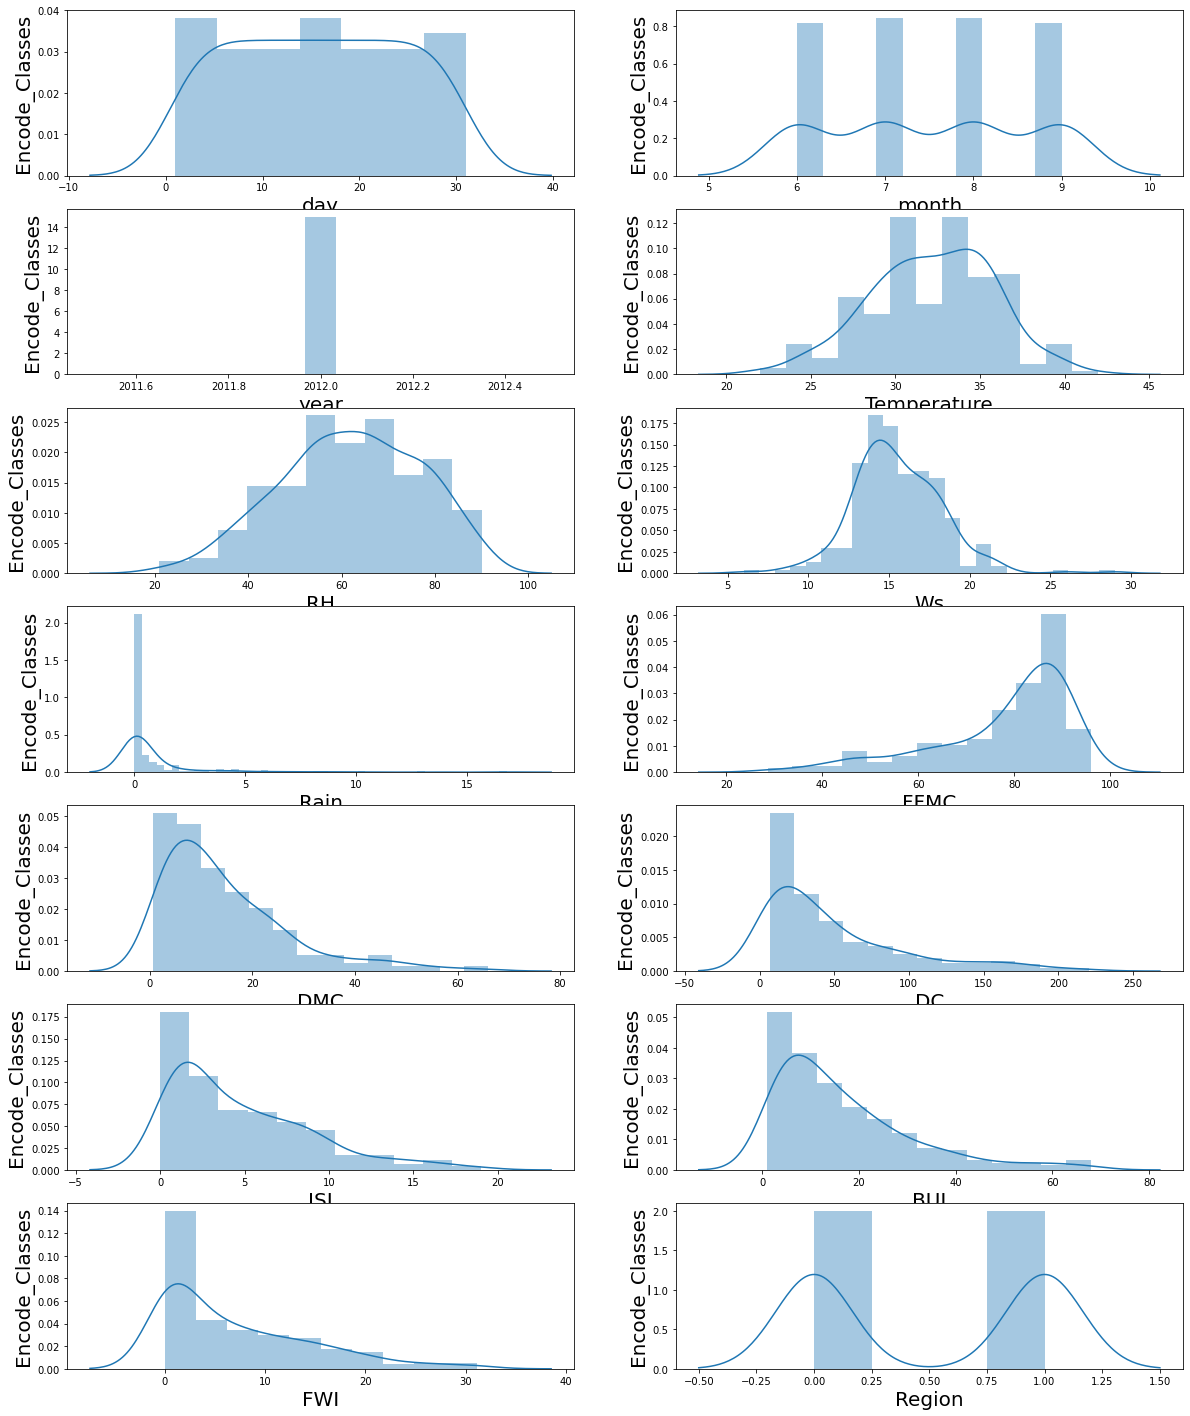

In [71]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=14 :     # as there are 14 columns in the data
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Encode_Classes',fontsize=20)
    plotnumber+=1
plt.show()

In [72]:
#This Show That column Contain Zero
print(df.eq(0).any())

day               False
month             False
year              False
Temperature       False
RH                False
Ws                False
Rain               True
FFMC              False
DMC               False
DC                False
ISI                True
BUI               False
FWI                True
Region             True
Encode_Classes     True
dtype: bool


We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Rain,ISI And FWI which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.

In [73]:
df['Rain']=df['Rain'].replace(0,df['Rain'].mean())
df['ISI']=df['ISI'].replace(0,df['ISI'].mean())
df['FWI']=df['FWI'].replace(0,df['FWI'].mean())

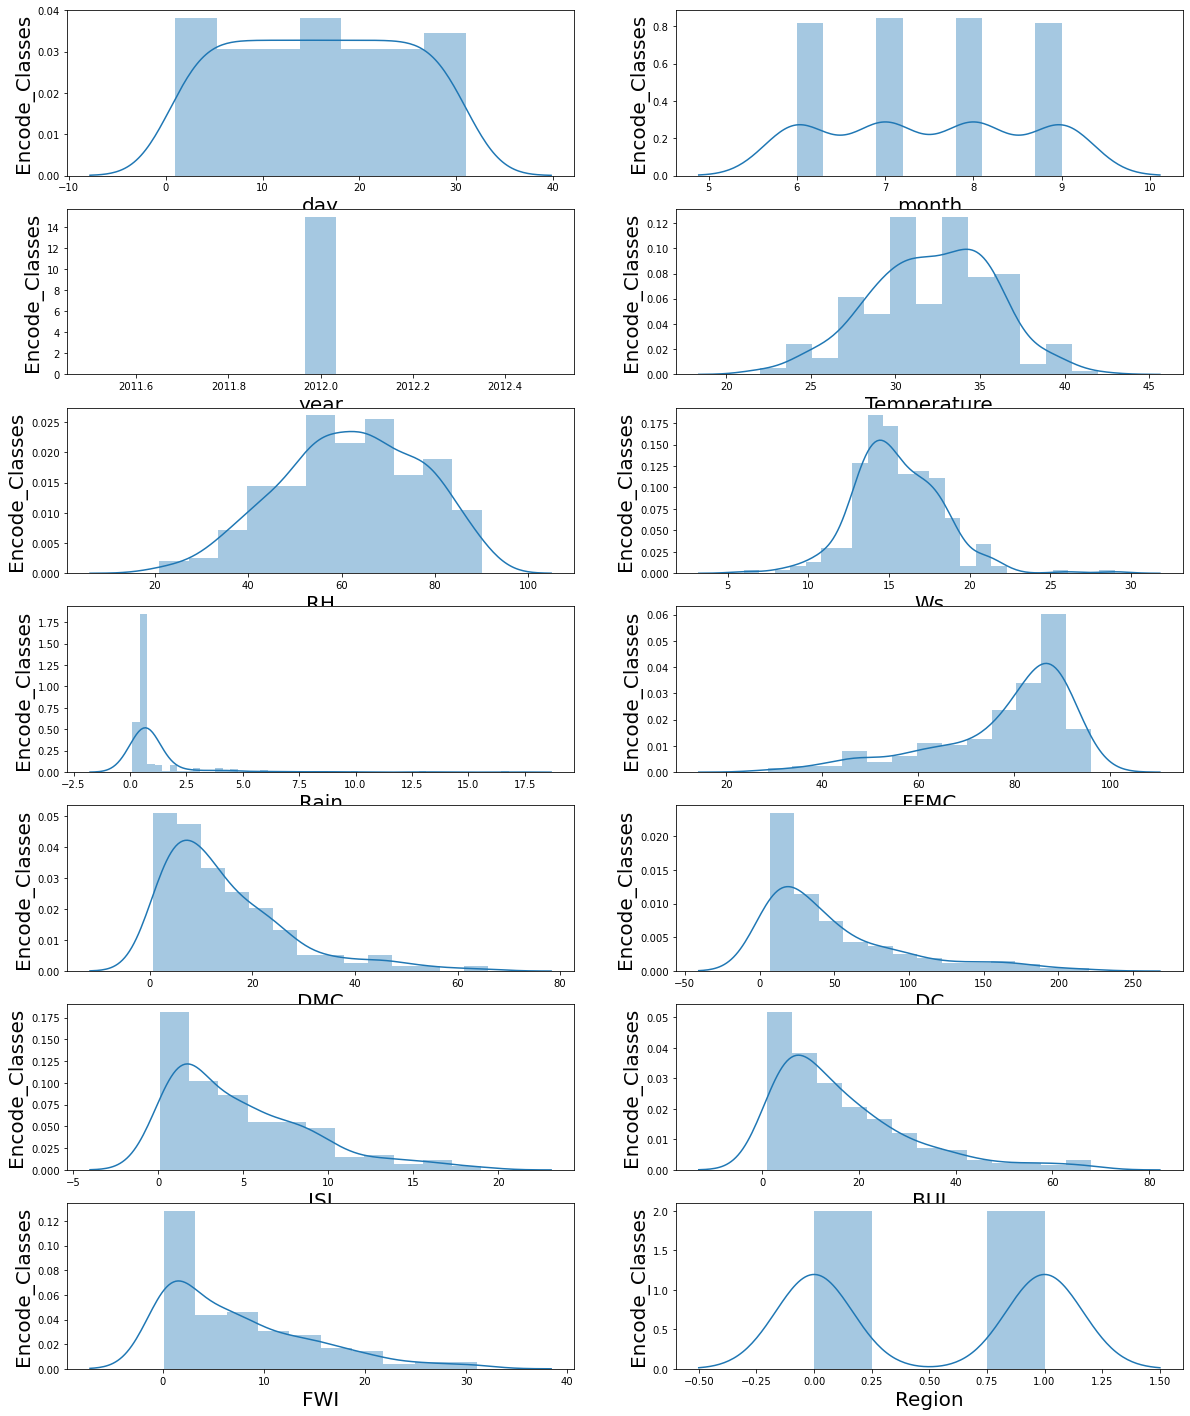

In [74]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=14 :     # as there are 14 columns in the data
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Encode_Classes',fontsize=20)
    plotnumber+=1
plt.show()

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.
Let's deal with them.

<AxesSubplot:>

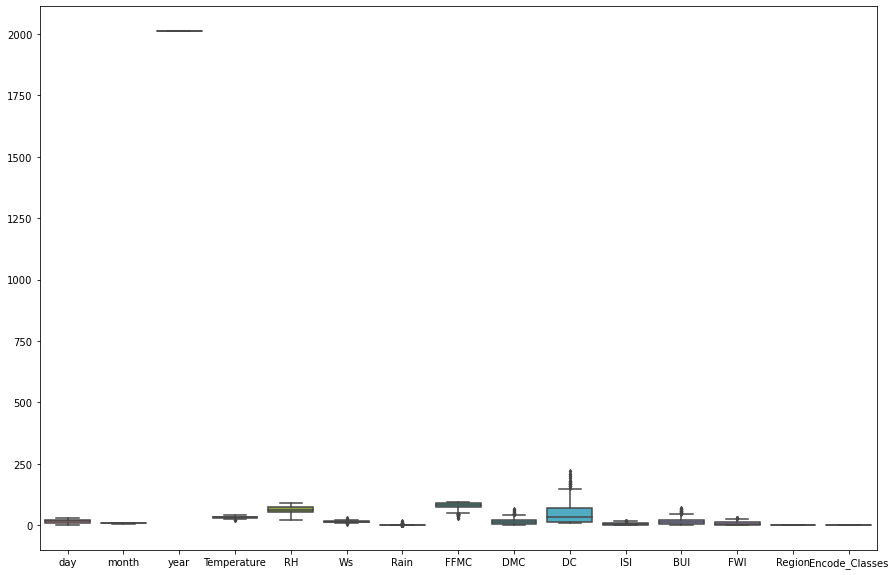

In [75]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.8,ax=ax,  fliersize=3)

In [76]:
Upper_limit=df['Temperature'].quantile(0.99)
lower_limit=df['Temperature'].quantile(0.01)
df_cleaned=df[(df['Temperature']<=Upper_limit) & (df['Temperature']>=lower_limit)]
#We Are Removing the 1% of data from Temeprature column
Upper_limit=df['Ws'].quantile(0.98)
lower_limit=df['Ws'].quantile(0.02)
df_cleaned=df[(df['Ws']<=Upper_limit) & (df['Ws']>=lower_limit)]
#We Are Removing the 2% of data from Temeprature column
Upper_limit=df['Rain'].quantile(0.99)
lower_limit=df['Rain'].quantile(0.01)
df_cleaned=df[(df['Rain']<=Upper_limit) & (df['Rain']>=lower_limit)]
#We Are Removing the 1% of data from Temeprature column
Upper_limit=df['FFMC'].quantile(0.98)
lower_limit=df['FFMC'].quantile(0.02)
df_cleaned=df[(df['FFMC']<=Upper_limit) & (df['FFMC']>=lower_limit)]
#We Are Removing the 2% of data from Temeprature column
Upper_limit=df['DMC'].quantile(0.99)
lower_limit=df['DMC'].quantile(0.01)
df_cleaned=df[(df['DMC']<=Upper_limit) & (df['DMC']>=lower_limit)]
#We Are Removing the 1% of data from Temeprature column
Upper_limit=df['DC'].quantile(0.95)
lower_limit=df['DC'].quantile(0.05)
df_cleaned=df[(df['DC']<=Upper_limit) & (df['DC']>=lower_limit)]
#We Are Removing the 5% of data from Temeprature column
Upper_limit=df['ISI'].quantile(0.99)
lower_limit=df['ISI'].quantile(0.01)
df_cleaned=df[(df['ISI']<=Upper_limit) & (df['ISI']>=lower_limit)]
#We Are Removing the 1% of data from Temeprature column
Upper_limit=df['BUI'].quantile(0.98)
lower_limit=df['BUI'].quantile(0.02)
df_cleaned=df[(df['BUI']<=Upper_limit) & (df['BUI']>=lower_limit)]
#We Are Removing the 2% of data from Temeprature column
Upper_limit=df['FWI'].quantile(0.99)
lower_limit=df['FWI'].quantile(0.01)
df_cleaned=df[(df['FWI']<=Upper_limit) & (df['FWI']>=lower_limit)]
#We Are Removing the 1% of data from Temeprature column

<AxesSubplot:>

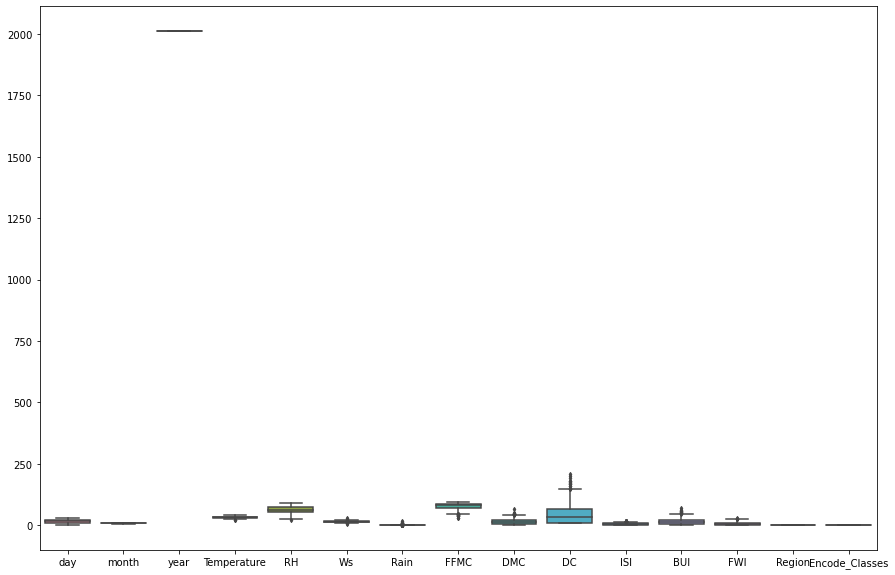

In [77]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_cleaned, width= 0.8,ax=ax,  fliersize=3)

# Split Dataset into Independent and Dependent Features

In [78]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

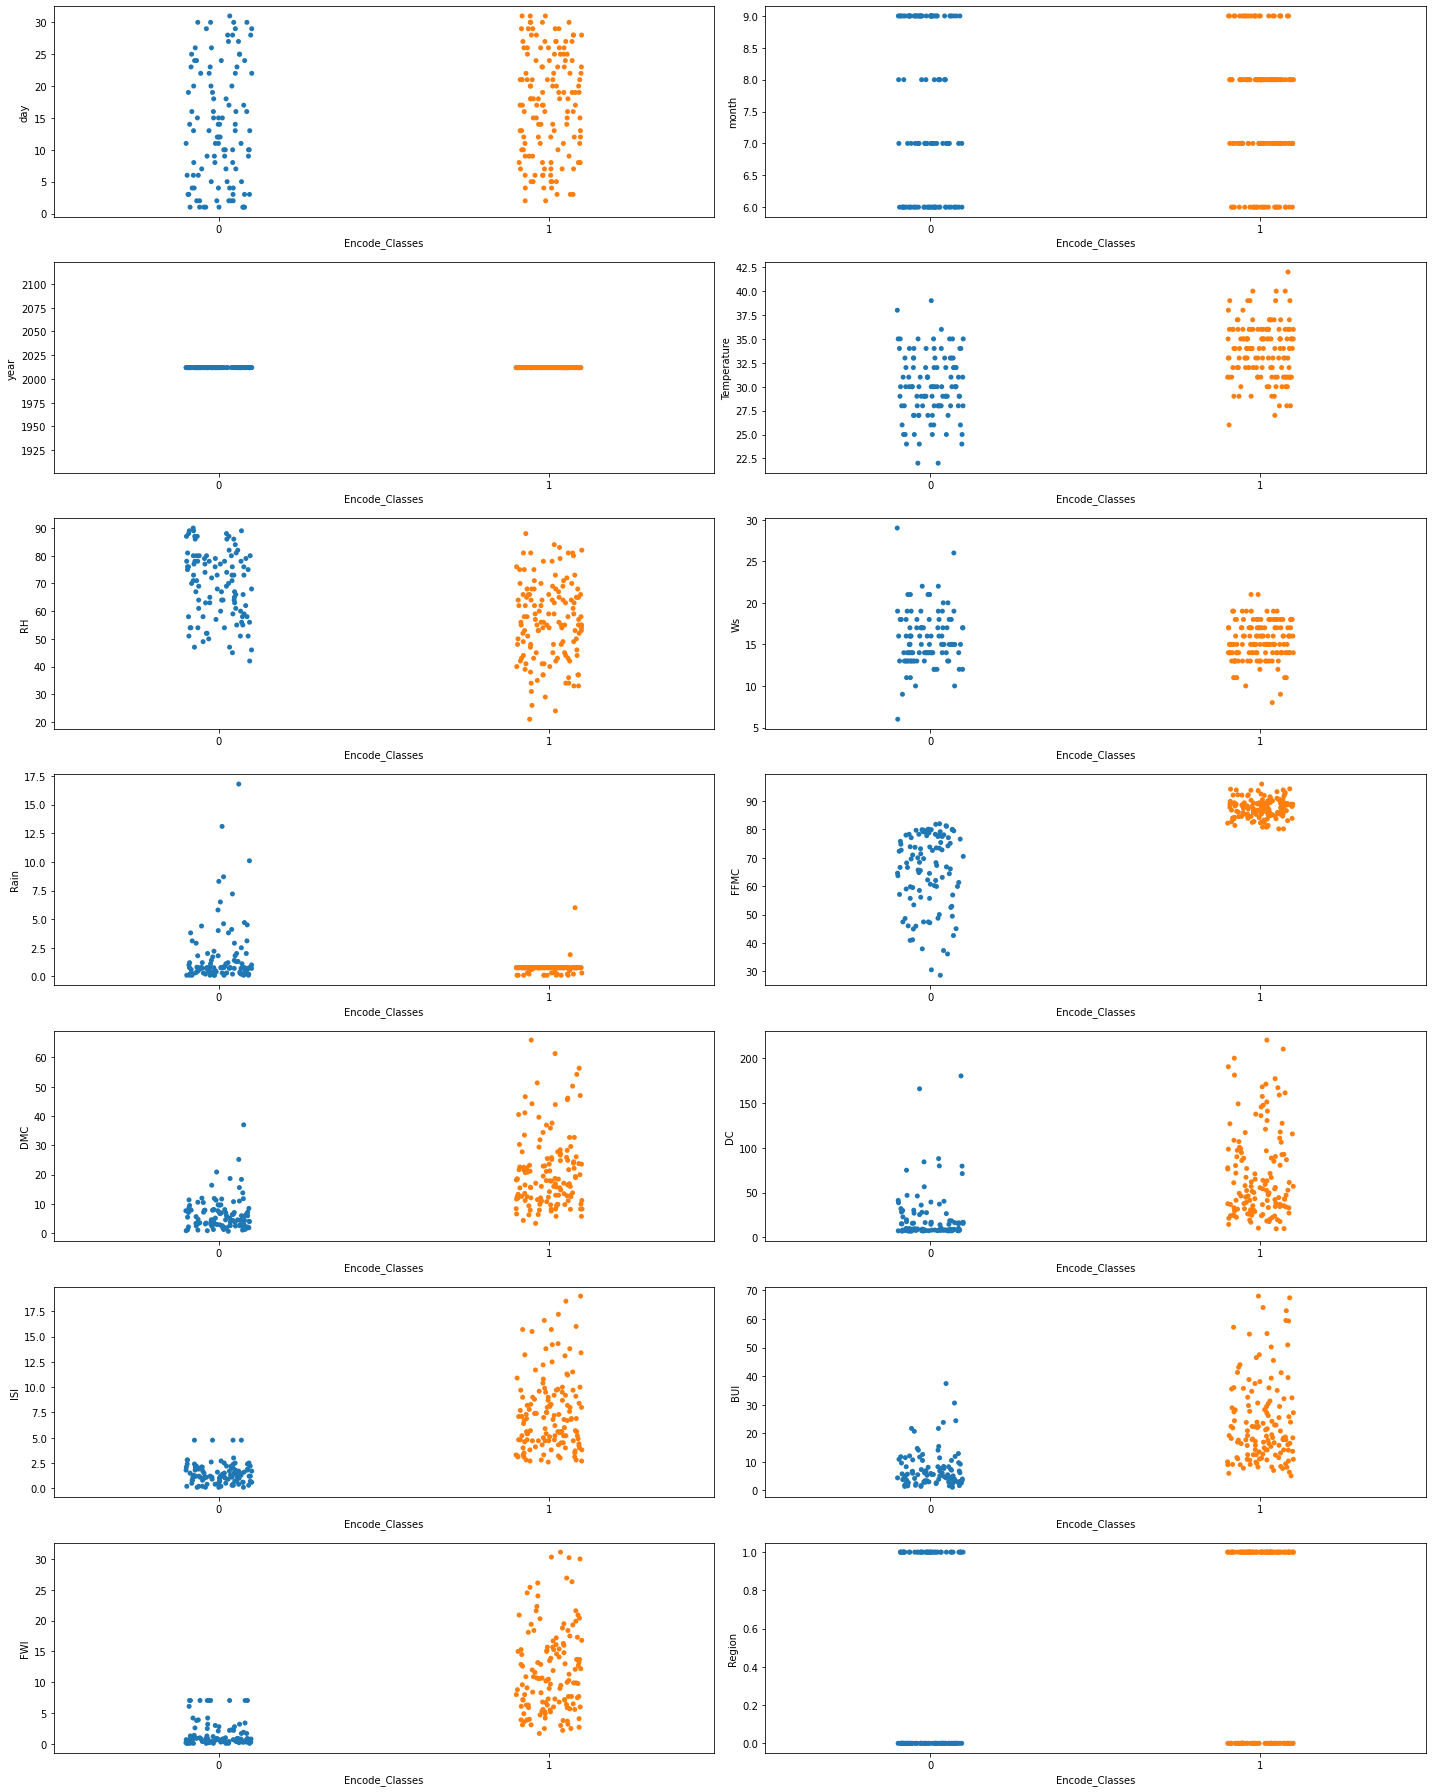

In [79]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=14 :
        ax = plt.subplot(7,2,plotnumber)
        sns.stripplot(Y,X[column])
    plotnumber+=1
plt.tight_layout()

In [80]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [81]:
X_scaled

array([[-1.67527776, -1.35052592,  0.        , ..., -0.93655635,
        -0.93483822, -1.        ],
       [-1.56173115, -1.35052592,  0.        , ..., -0.9012768 ,
        -0.94856729, -1.        ],
       [-1.44818455, -1.35052592,  0.        , ..., -0.98594772,
        -0.98975448, -1.        ],
       ...,
       [ 1.39048054,  1.35052592,  0.        , ..., -0.93655635,
        -0.97602542,  1.        ],
       [ 1.50402714,  1.35052592,  0.        , ..., -0.81660589,
        -0.9073801 ,  1.        ],
       [ 1.61757374,  1.35052592,  0.        , ..., -0.83777362,
        -0.93483822,  1.        ]])

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X_scaled,Y,test_size=0.33,random_state=10)

In [83]:
X_train.shape

(163, 14)

In [84]:
Y_train.shape

(163,)

In [85]:
X_test.shape

(81, 14)

In [86]:
Y_test.shape

(81,)

In [87]:
classifier=LogisticRegression()

In [88]:
print(classifier)

LogisticRegression()


In [89]:
# classifier.fit(X_train,Y_train)

In [90]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50,60],'max_iter':[100,200,300]}

In [91]:
classifier_regression=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [92]:
classifier_regression.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 60],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [93]:
classifier_regression.best_score_

0.9816287878787879

In [94]:
# We came to know that which parameter is got Selected
classifier_regression.best_params_

{'C': 3, 'max_iter': 100, 'penalty': 'l2'}

In [95]:
#Prediction 
Log_Pred=classifier_regression.predict(X_test)

In [96]:
score=accuracy_score(Log_Pred,Y_test)
print(score)

0.9259259259259259


In [97]:
classification_report(Log_Pred,Y_test)


'              precision    recall  f1-score   support\n\n           0       1.00      0.83      0.91        36\n           1       0.88      1.00      0.94        45\n\n    accuracy                           0.93        81\n   macro avg       0.94      0.92      0.92        81\nweighted avg       0.93      0.93      0.92        81\n'

In [98]:
print(classification_report(Log_Pred,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        36
           1       0.88      1.00      0.94        45

    accuracy                           0.93        81
   macro avg       0.94      0.92      0.92        81
weighted avg       0.93      0.93      0.92        81



In [99]:
#Confusion Matrix
conf_mat=confusion_matrix(Y_test,Log_Pred)
conf_mat

array([[30,  0],
       [ 6, 45]], dtype=int64)

In [100]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [101]:
#Breaking down the formula for Accuracy
Accuracy= (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.9259259259259259

In [102]:
#Precision
Precision=true_positive/(true_positive+false_positive)
Precision

1.0

In [103]:
#Recall
Recall=true_positive/(true_positive+false_negative)
Recall

0.8333333333333334

In [104]:
# F1 Score If FP And FN both are Important Beta=1
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9090909090909091

In [105]:
#IF Fp Is more Important than FN Beta=0.5
F_Five_score=(1+0.25)*(Recall*Precision)/(0.25*Precision+Recall)
F_Five_score

0.9615384615384615

In [106]:
# If FN More Important than FP Beta=2
F2_score=(1+4)*(Precision*Recall)/(4*Precision+Recall)
F2_score

0.8620689655172415